# Project: Looking into IMDB data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 
> in this notebook we are going to explore the imdb database to see if you can extract some intresting findings that will help us understand the movie industry a little bit more
imdb stands for internet Internet Movie Database and is just like the name suggest a huge community oriented website that hold a huge database of movies and their informations and where the community can vote for each movie they have seen
we will be trying answer many questions like,which movie had the most budget,what are the properties that influance a movie's revenu most,which is the movie genre that gross the most ect

In [42]:
#we are going to import the necessary libraries
import pandas as pd,numpy as np,matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [43]:
df_imdb = pd.read_csv('tmdb-movies.csv')
df_imdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [44]:
df_imdb.shape

(10866, 21)

we can see that we have 10866 rows and 21 columns,let's see what are the columns that we have

In [45]:
df_imdb.columns.values

array(['id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype=object)

In [46]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can observe that we have many null values,let's see if we have some dublicated values

In [47]:
sum(df_imdb.duplicated())

1

we can oberve that we have only one dublicated row

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

let's remove the dublicated cell for safety measure

In [48]:
df_imdb.drop_duplicates(inplace=True)
df_imdb.shape

(10865, 21)

the homepage column seems to be non relevant in our case so we are going to remove it

In [49]:
df_imdb.drop(columns='homepage',axis = 1,inplace =True)

upon working on the data i have found that many movies does not have a budget or revenue we will be removing them

In [50]:
df_imdb.query('budget != 0',inplace=True)
df_imdb.query('revenue != 0',inplace=True)

In [51]:
df_imdb.shape

(3854, 20)

<a id='eda'></a>
## Exploratory Data Analysis

> 

### biggest budget

### first let's see some basic statistics about each column

In [52]:
df_imdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


we can already extract some intersting data from this table,especialy concerning budget and revenue means and vote average mean ect,let's now see the destribution of each column

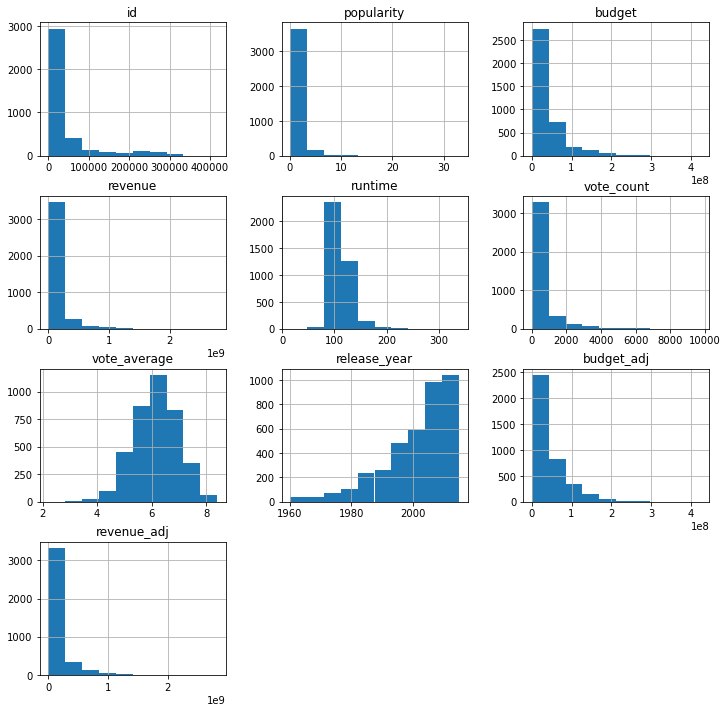

In [53]:
df_imdb.hist(figsize=(12,12));

In [54]:
df_imdb[df_imdb['budget']==df_imdb['budget'].max()]
print("the movie which had the most budget:")
print(df_imdb[df_imdb['budget']==df_imdb['budget'].max()]['original_title'])
print(df_imdb['budget'].max())

the movie which had the most budget:
2244    The Warrior's Way
Name: original_title, dtype: object
425000000


the movie that had the most budget is The Warrior's Way and it had a budget of 425000000 dollars

### most revenue

we are gong to see a histogram of the budget of the movies

In [13]:
df_imdb[df_imdb['revenue']==df_imdb['revenue'].max()]
print("the movie which had the most revenue:")
print(df_imdb[df_imdb['revenue']==df_imdb['revenue'].max()]['original_title'])
df_imdb['revenue'].max()

the movie which had the most revenue:
1386    Avatar
Name: original_title, dtype: object


2781505847

the movie that had the most budget is avatar it had grossed 2781505847 dollars,this happend because the director is very popular and this movie was one of the first to use 3D technologie in the cinema

### most popular movie

In [41]:
df_imdb[df_imdb['popularity']==df_imdb['popularity'].max()]['original_title']

0    Jurassic World
Name: original_title, dtype: object

the most popular movie is Jurassic World,this means that jurassic world is the movie that got the most votes in the websites history.this is because it was a long awaited movie that came 14 years after the last movie (jurasisc park 3)

### we are going to see the movie with the higher vote_average

In [56]:
print("the movie which had the most vote_average:")
print(df_imdb[df_imdb['vote_average']==df_imdb['vote_average'].max()]['original_title'])

the movie which had the most vote_average:
4178    The Shawshank Redemption
7948           Stop Making Sense
Name: original_title, dtype: object


most vote_average : The Shawshank Redemption 

### histogram of vote_average


Text(0.5, 1.0, 'histogram of the distrebution of average movie')

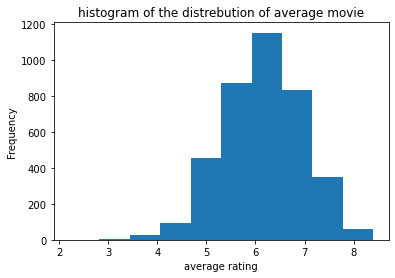

In [33]:
df_imdb['vote_average'].plot.hist(title='histogram of average rating of the movies')
plt.xlabel('average rating')
plt.title('histogram of the distrebution of average movie')

we can observe that  most movie get beetween 6 and 7 and that the distribution is almost normally distributed

### let's see if budget have an impact on the average rating


Text(0, 0.5, 'budget')

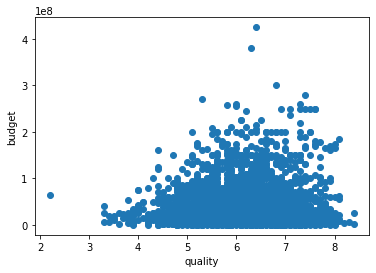

In [31]:
plt.scatter(df_imdb['vote_average'],df_imdb['budget'])
plt.xlabel('quality')
plt.ylabel('budget')
plt.title('scatterplot of budget and vote average')

this is a very important question and answering it will help film maker know if augmenting the budget will help them get more revenue ,sadly we cannot say for sur that high budget movies have higher influence on voting average,let's see if high revenue movies have higher influance on voting average

Text(0, 0.5, 'revenue in billions')

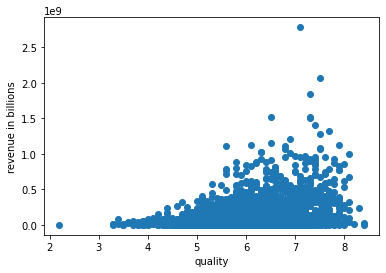

In [30]:
plt.scatter(df_imdb['vote_average'],df_imdb['revenue'])
plt.xlabel('quality')
plt.ylabel('revenue in billions')
plt.title('scatterplot of revenue and vote average')

answering this question will help film maker know if highly like movie will generate more money.there is a possibility that high revenue movies have high voting average,because we can see that high revenue moving are more to the right of the plot but this must be verified with statistics,let's verify this

Text(0.5, 1.0, 'scatterplot of revenue and vote average')

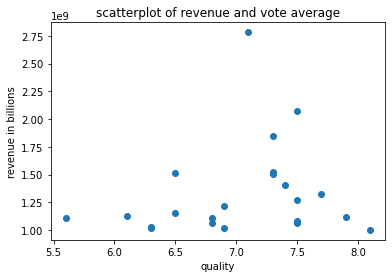

In [59]:
df_high_revenue = df_imdb.query('revenue > 1000000000')
plt.scatter(df_high_revenue['vote_average'],df_high_revenue['revenue'])
plt.xlabel('quality')
plt.ylabel('revenue in billions')
plt.title('scatterplot of revenue and vote average')

with taking only movie that have more than one billion in revenue,we see no clear answer to this question

### let's now see if the runtime have an impact on average vote

Text(0.5, 1.0, 'scatterplot of runtime and vote average')

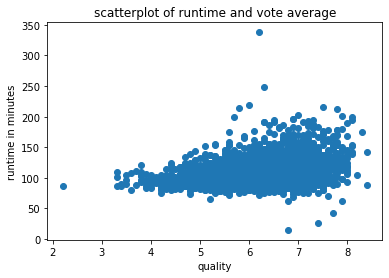

In [77]:
plt.scatter(df_imdb['vote_average'],df_imdb['runtime'])
plt.xlabel('quality')
plt.ylabel('runtime in minutes')
plt.title('scatterplot of runtime and vote average')

we cannot say that runtime have any influance in the voting average based on this plot

let's see who is the director that have grossed the most revenue with all of his movies

In [20]:
df_directors = df_imdb.groupby('director')['revenue'].sum()
print(df_directors[df_directors == df_directors.max()])

director
Steven Spielberg    9018563772
Name: revenue, dtype: int64


### let's see who is the director that have the highest voting average mean for all of his movies

In [21]:
df_directors = df_imdb.groupby('director')['vote_average'].mean()
print(df_directors[df_directors == df_directors.max()])

director
Damien Chazelle    8.2
Name: vote_average, dtype: float64


### let's see what are the most represented movie genres with a pie chart

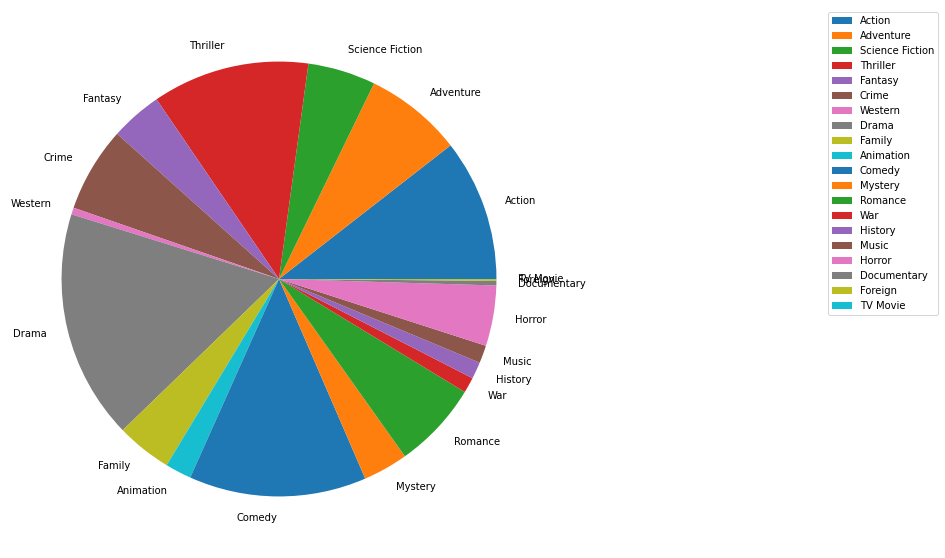

In [75]:
plt.figure(figsize=(10,10))
liste = []
for e in df_imdb['genres']:
    liste=liste + e.split("|")
counts = Counter(liste)
label = []
size = []
for i, j in counts.items():
    label.append(i)
    size.append(j)
plt.pie(size, labels=label)
plt.show()

we can see that there are a lot of Drama movies and comedy movies,let's see if they are the one's that generate the most revenue

### let's see what genres of movies get the most revenues

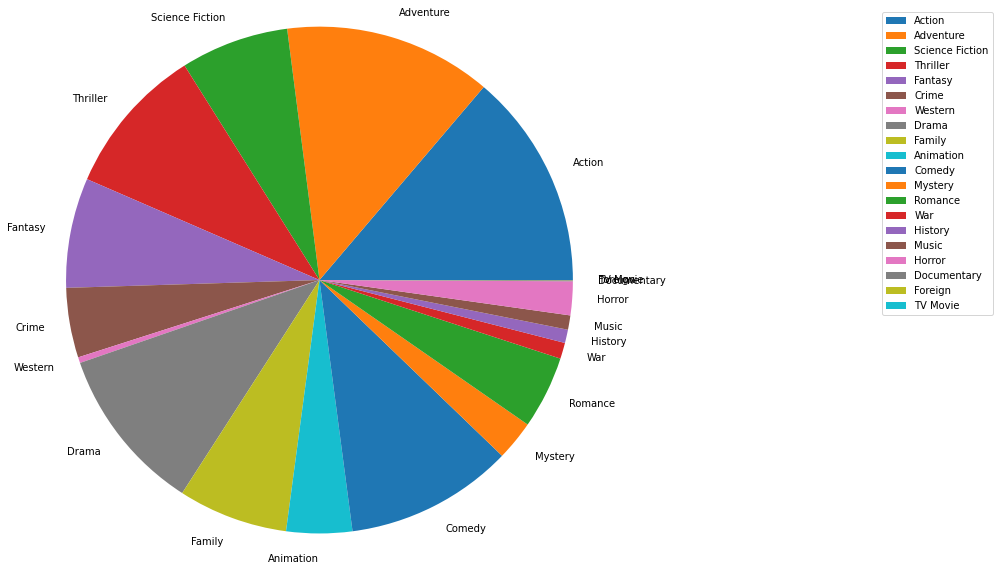

In [76]:
i=0
liste = {}
liste2 = []
a=0
b=0
for e in df_imdb['genres']:
    a = df_imdb['revenue'].iloc[i]
    i = i + 1
    liste2= liste2 + e.split("|")
    for z in liste2:
        if z in liste:
            b = liste[z] + a
            liste[z] = b
        else :
            liste[z] = a
    liste2 = []

#now let's plot a pie to visualize the results
label = []
size = []
for i, j in liste.items():
    label.append(i)
    size.append(j)

plt.figure(figsize=(10,10))
plt.pie(size, labels=label)
plt.legend(bbox_to_anchor=(1.5,1),loc="upper left")
plt.axis('equal')
plt.show()

Drama movies and comedy movies do generate a lot of revenue but they are not the best grossing movies( in term of addition of all the movies of the same type),adventure and action movies are the ones that generate the biggest amount of revenue.yhis can be explained by the popularity of super hero movies in our recent years (2010-present).

we can see that adventure movies are the one that gross the most revenue

<a id='conclusions'></a>
## Conclusions
    it is very hard to conclude what are the properties that affect the most the revenues of a movie,and we need to go beyond Exploratory Data Analysis and use most statistical tools,but we can say that adventre movie are more popular and that they have grossed the most of all movie genres,and that despite drama movies being the most present they gross less(compared to adventure movies).there is also a possibility that movies with good average rating also have better revenue which seems logical(good movies will be watch more than bad movies)